In [2]:
from desispec.io import read_spectra
from desitrip.preproc import rebin_flux, rescale_flux

from glob import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table

import os
import platform

mpl.rc('font', size=14)

In [3]:
def condition_spectra(coadd_files, truth_files):
    """Read DESI spectra, rebin to a subsampled logarithmic wavelength grid, and rescale.
    
    Parameters
    ----------
    coadd_files : list or ndarray
        List of FITS files on disk with DESI spectra.
    truth_files : list or ndarray
        Truth files.
    
    Returns
    -------
    fluxes : ndarray
        Array of fluxes rebinned to a logarithmic wavelength grid.
    """
    fluxes = None
    
    for cf, tf in zip(coadd_files, truth_files):
        spectra = read_spectra(cf)
        wave = spectra.wave['brz']
        flux = spectra.flux['brz']
        ivar = spectra.ivar['brz']
        
        truth = Table.read(tf, 'TRUTH')
        truez = truth['TRUEZ']
#         uid = truth ['TARGETID']
#         # Pre-condition: remove spectra with NaNs and zero flux values.
#         mask = np.isnan(flux).any(axis=1) | (np.count_nonzero(flux, axis=1) == 0)
#         mask_idx = np.argwhere(mask)
#         flux = np.delete(flux, mask_idx, axis=0)
#         ivar = np.delete(ivar, mask_idx, axis=0)
        # Rebin and rescale fluxes so that each is normalized between 0 and 1.
        rewave, reflux, reivar = rebin_flux(wave, flux, ivar, truez, minwave=2500., maxwave=9500., nbins=150, log=True, clip=True)
        rsflux = rescale_flux(reflux)
        if fluxes is None:
            fluxes = rsflux
        else:
            fluxes = np.concatenate((fluxes, rsflux))
    
    return fluxes

In [4]:
def condition_spectra(coadd_files, truth_files):
    """Read DESI spectra, rebin to a subsampled logarithmic wavelength grid, and rescale.
    
    Parameters
    ----------
    coadd_files : list or ndarray
        List of FITS files on disk with DESI spectra.
    truth_files : list or ndarray
        Truth files.
    
    Returns
    -------
    fluxes : ndarray
        Array of fluxes rebinned to a logarithmic wavelength grid.
    """
    fluxes = None
    
    for cf, tf in zip(coadd_files, truth_files):
        spectra = read_spectra(cf)
        wave = spectra.wave['brz']
        flux = spectra.flux['brz']
        ivar = spectra.ivar['brz']
        
        truth = Table.read(tf, 'TRUTH')
        truez = truth['TRUEZ']

#         # Pre-condition: remove spectra with NaNs and zero flux values.
#         mask = np.isnan(flux).any(axis=1) | (np.count_nonzero(flux, axis=1) == 0)
#         mask_idx = np.argwhere(mask)
#         flux = np.delete(flux, mask_idx, axis=0)
#         ivar = np.delete(ivar, mask_idx, axis=0)

        # Rebin and rescale fluxes so that each is normalized between 0 and 1.
        rewave, reflux, reivar = rebin_flux(wave, flux, ivar, truez, minwave=2500., maxwave=9500., nbins=150, log=True, clip=True)
        rsflux = rescale_flux(reflux)

        if fluxes is None:
            fluxes = rsflux
        else:
            fluxes = np.concatenate((fluxes, rsflux))
    
    return fluxes

In [5]:
host_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/hosts/*truth.fits'))
host_coadd = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/hosts/*coadd.fits'))
host_flux  = condition_spectra(host_coadd, host_truth)

In [6]:
snia_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ia/hsiao/*truth.fits'))
snia_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ia/hsiao/*coadd.fits'))
snia_flux  = condition_spectra(snia_files, snia_truth)

In [7]:
snib_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ib/*/*truth.fits'))
snib_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ib/*/*coadd.fits'))
snib_flux  = condition_spectra(snib_files, snib_truth)

In [8]:
snibc_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ibc/*/*truth.fits'))
snibc_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ibc/*/*coadd.fits'))
snibc_flux  = condition_spectra(snibc_files, snibc_truth)

In [9]:
snic_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ic/*/*truth.fits'))
snic_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_ic/*/*coadd.fits'))
snic_flux  = condition_spectra(snic_files, snic_truth)

In [10]:
sniin_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_iin/*/*truth.fits'))
sniin_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_iin/*/*coadd.fits'))
sniin_flux  = condition_spectra(sniin_files, sniin_truth)

In [11]:
sniilp_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_iilp/*/*truth.fits'))
sniilp_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_iilp/*/*coadd.fits'))
sniilp_flux  = condition_spectra(sniilp_files, sniilp_truth)

In [12]:
sniip_truth = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_iip/*/*truth.fits'))
sniip_files = sorted(glob('/global/cfs/projectdirs/desi/science/td/sim/bgs/150s/sn_iip/*/*coadd.fits'))
sniip_flux  = condition_spectra(sniip_files, sniip_truth)

In [13]:
nhost, nbins  = host_flux.shape
nsnia, nbins  = snia_flux.shape
nsnib, nbins  = snib_flux.shape
nsnibc, nbins = snibc_flux.shape
nsnic, nbins  = snic_flux.shape
nsniin, nbins = sniin_flux.shape
nsniilp, nbins = sniilp_flux.shape
nsniip, nbins = sniip_flux.shape
nhost, nsnia, nsnib, nsnibc, nsnic, nsniin, nsniilp, nsniip, nbins

(9969, 9964, 9958, 9971, 8269, 9949, 9948, 9962, 150)

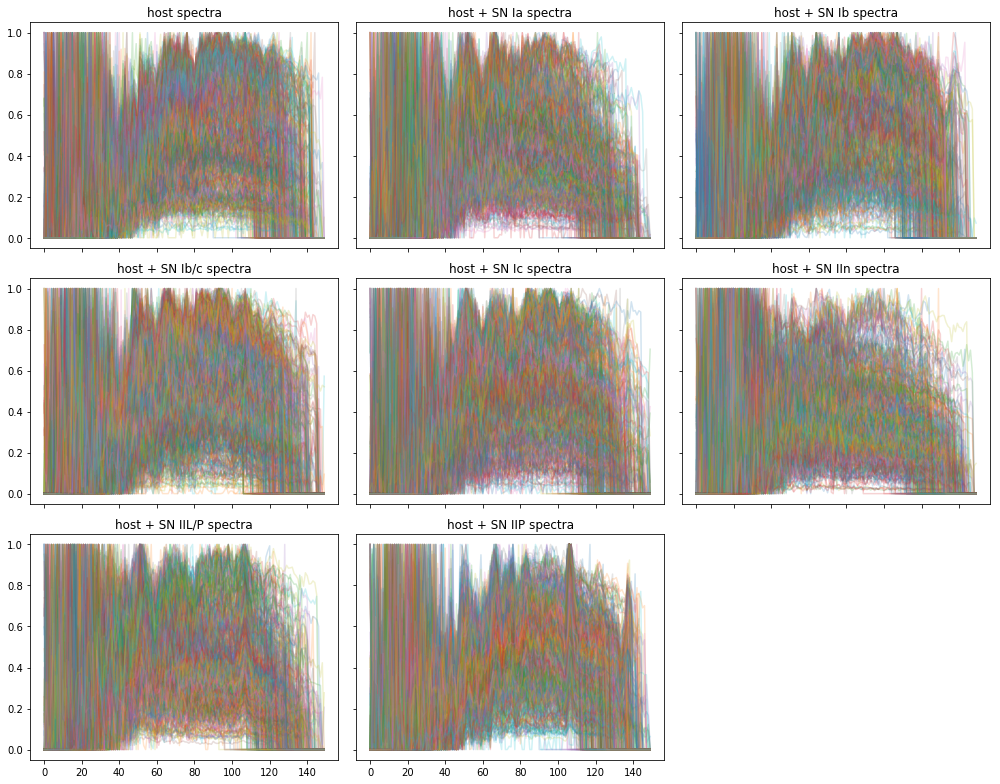

In [14]:
fig, axes = plt.subplots(3,3, figsize=(14,11), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(0,500):
    
    ax = axes[0]
    ax.plot(host_flux[i], alpha=0.2)

    ax = axes[1]
    ax.plot(snia_flux[i], alpha=0.2)
    
    ax = axes[2]
    ax.plot(snib_flux[i], alpha=0.2)
    
    ax = axes[3]
    ax.plot(snibc_flux[i], alpha=0.2)
    
    ax = axes[4]
    ax.plot(snic_flux[i], alpha=0.2)
    
    ax = axes[5]
    ax.plot(sniin_flux[i], alpha=0.2)

    ax = axes[6]
    ax.plot(sniilp_flux[i], alpha=0.2)
    
    ax = axes[7]
    ax.plot(sniip_flux[i], alpha=0.2)
    
axes[0].set_title('host spectra')
axes[1].set_title('host + SN Ia spectra')
axes[2].set_title('host + SN Ib spectra')
axes[3].set_title('host + SN Ib/c spectra')
axes[4].set_title('host + SN Ic spectra')
axes[5].set_title('host + SN IIn spectra')
axes[6].set_title('host + SN IIL/P spectra')
axes[7].set_title('host + SN IIP spectra')

axes[8].axis('off')

fig.tight_layout()

In [15]:
#Create gaussian noise
def gaussianNoise(spectra, mean, std):
    noise = np.random.normal(mean, std, [150]) 
    trial=[]
    l=0
    for i in spectra:
        if i!=0:
            if i+noise[l]>=0:
                trial.append(i+noise[l])
            else:
                trial.append(0)
        else:
            trial.append(i)
        l=l+1
        
    return trial

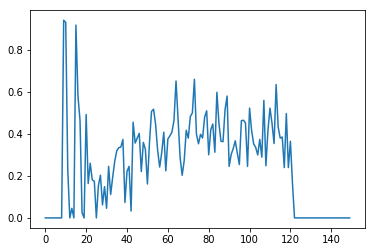

In [16]:
check = gaussianNoise(host_flux[2],0,.1)
plt.plot(check)

In [17]:
#create a mask sized maskSize at a random point in the spectra
def mask(spectra, maskSize):
    random_150=np.random.randint(0,150-maskSize)
    trial1=[]
    l=0
    masklist=[]
    for i in range(maskSize):
        masklist.append(random_150+i)

    for i in spectra:
        if l in masklist:
            trial1.append(0)
        else:
            trial1.append(i)

        l=l+1
        
    return trial1

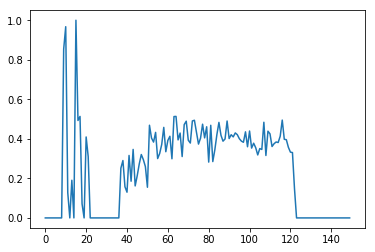

In [18]:
checkIt = mask(host_flux[2],15)
plt.plot(checkIt)

In [19]:
noise_host_flux=[]
for i in host_flux:
    add = gaussianNoise(i,0,.2)
    noise_host_flux.append(add)

In [20]:
noise_host_flux=np.asarray(noise_host_flux)

In [21]:
mask_host_flux=[]
for i in host_flux:
    add=mask(i,15)
    mask_host_flux.append(add)

In [22]:
mask_host_flux=np.asarray(mask_host_flux)

In [23]:
host_flux = np.concatenate((host_flux, noise_host_flux,mask_host_flux))

In [24]:
noise_snia_flux=[]
for i in snia_flux:
    add = gaussianNoise(i,0,.2)
    noise_snia_flux.append(add)

In [25]:
noise_snia_flux=np.asarray(noise_snia_flux)

In [26]:
mask_snia_flux=[]
for i in snia_flux:
    add=mask(i,15)
    mask_snia_flux.append(add)

In [27]:
mask_snia_flux=np.asarray(mask_snia_flux)

In [28]:
snia_flux = np.concatenate((snia_flux, noise_snia_flux,mask_snia_flux))

In [29]:
#snib
noise_snib_flux=[]
for i in snib_flux:
    add = gaussianNoise(i,0,.2)
    noise_snib_flux.append(add)

In [30]:
noise_snib_flux=np.asarray(noise_snib_flux)

In [31]:
mask_snib_flux=[]
for i in snib_flux:
    add=mask(i,15)
    mask_snib_flux.append(add)

In [32]:
mask_snib_flux=np.asarray(mask_snib_flux)

In [33]:
snib_flux = np.concatenate((snib_flux, noise_snib_flux,mask_snib_flux))

In [34]:
#snibc
noise_snibc_flux=[]
for i in snibc_flux:
    add = gaussianNoise(i,0,.2)
    noise_snibc_flux.append(add)


In [35]:
noise_snibc_flux=np.asarray(noise_snibc_flux)

In [36]:
mask_snibc_flux=[]
for i in snibc_flux:
    add=mask(i,15)
    mask_snibc_flux.append(add)

In [37]:
mask_snibc_flux=np.asarray(mask_snibc_flux)

In [38]:
snibc_flux = np.concatenate((snibc_flux, noise_snibc_flux,mask_snibc_flux))

In [39]:
#snic
noise_snic_flux=[]
for i in snic_flux:
    add = gaussianNoise(i,0,.2)
    noise_snic_flux.append(add)


In [40]:
noise_snic_flux=np.asarray(noise_snic_flux)

In [41]:
mask_snic_flux=[]
for i in snic_flux:
    add=mask(i,15)
    mask_snic_flux.append(add)

In [42]:
mask_snic_flux=np.asarray(mask_snic_flux)

In [43]:
snic_flux = np.concatenate((snic_flux, noise_snic_flux,mask_snic_flux))

In [44]:
#sniin
noise_sniin_flux=[]
for i in sniin_flux:
    add = gaussianNoise(i,0,.2)
    noise_sniin_flux.append(add)


In [45]:
noise_sniin_flux=np.asarray(noise_sniin_flux)

In [46]:
mask_sniin_flux=[]
for i in sniin_flux:
    add=mask(i,15)
    mask_sniin_flux.append(add)

In [47]:
mask_sniin_flux=np.asarray(mask_sniin_flux)

In [48]:
sniin_flux = np.concatenate((sniin_flux, noise_sniin_flux,mask_sniin_flux))

In [49]:
#sniilp
noise_sniilp_flux=[]
for i in sniilp_flux:
    add = gaussianNoise(i,0,.2)
    noise_sniilp_flux.append(add)

In [50]:
noise_sniilp_flux=np.asarray(noise_sniilp_flux)

In [51]:
mask_sniilp_flux=[]
for i in sniilp_flux:
    add=mask(i,15)
    mask_sniilp_flux.append(add)

In [52]:
mask_sniilp_flux=np.asarray(mask_sniilp_flux)

In [53]:
sniilp_flux = np.concatenate((sniilp_flux, noise_sniilp_flux,mask_sniilp_flux))

In [54]:
#sniip
noise_sniip_flux=[]
for i in sniip_flux:
    add = gaussianNoise(i,0,.2)
    noise_sniip_flux.append(add)

In [55]:
noise_sniip_flux=np.asarray(noise_sniip_flux)

In [56]:
mask_sniip_flux=[]
for i in sniip_flux:
    add=mask(i,15)
    mask_sniip_flux.append(add)

In [57]:
mask_sniip_flux=np.asarray(mask_sniip_flux)

In [58]:
sniip_flux = np.concatenate((sniip_flux, noise_sniip_flux,mask_sniip_flux))

In [59]:
x = np.concatenate([host_flux, 
                    snia_flux,
                    snib_flux,
                    snibc_flux,
                    snic_flux,
                    sniin_flux,
                    sniilp_flux,
                    sniip_flux
                   ]).reshape(-1, nbins, 1)

labels = ['Host',
          'SN Ia',
          'SN Ib',
          'SN Ib/c',
          'SN Ic',
          'SN IIn',
          'SN IIL/P',
          'SN IIP']
ntypes = len(labels)

In [62]:
import pickle

with open(r'/global/u2/a/awasserm/augmented_data.data', 'wb') as augmented_data:
    pickle.dump(x, augmented_data) 